In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from SGA.SGA import *
from SGA.SGAParts import *
from SGA.SGAInstance import *

from ProblemDef import FirefighterProblem
from Displayer import Displayer

In [20]:
instance = SGAInstance("problems/p6.json",
    populationInitializer= basicPI,
    populationSize = 10,
    generationsNumber = 40,
    parentsSelector = basicParentsSelector,
    crossover = basicCrossover,
    mutationProb = 0.5,
    mutator = noMutator,
    fixer = basicFixer,
    evaluator = basicEvaluator)

firemans =SGA(instance)

1221
[37, 407, 535]


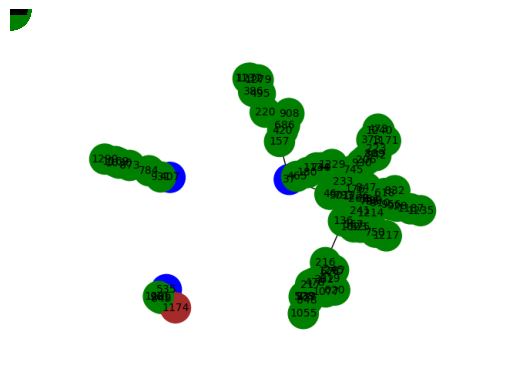

In [21]:
disp = Displayer()
instance.problem.visualize_fire_without_burned(disp, firemans)